In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import numpy as np


In [3]:
credit_card = pd.read_csv('data/cust_seg.csv')

credit_card.head(6)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,5,6,40,1,23,81,0.998,7.831,NaN,10.9


In [4]:
credit_card.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
credit_card.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
# inspecting
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
print (credit_card.isna().sum())
# Count the total number of missing values in the "Defaulted" column
missing_values_count = credit_card['Defaulted'].isnull().sum()

# Calculate the total number of instances
total_instances = len(credit_card)

# Calculate the percentage of missing values
percentage_missing_values = (missing_values_count / total_instances) * 100

print("Percentage of missing values in the 'Defaulted' column:", percentage_missing_values)

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64
Percentage of missing values in the 'Defaulted' column: 17.647058823529413


In [8]:
# Counting occurrences of values including missing values
defaulted_counts = credit_card['Defaulted'].value_counts(dropna=False)
print(defaulted_counts)

Defaulted
0.0    517
1.0    183
NaN    150
Name: count, dtype: int64


In [9]:
credit_card.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [10]:
credit_card.shape

(850, 9)

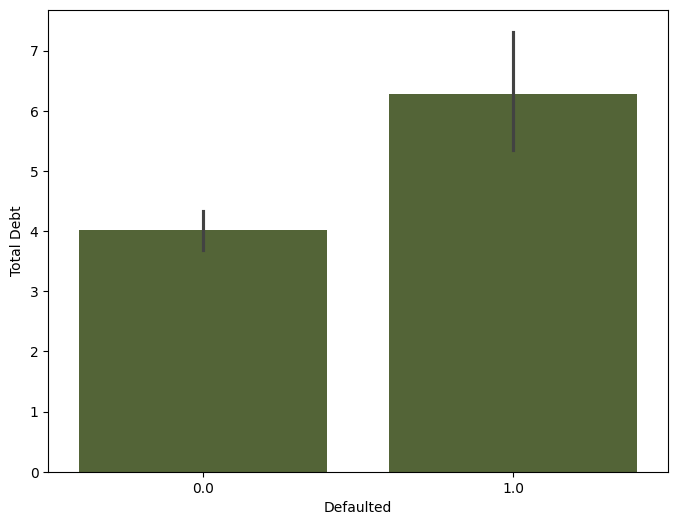

In [11]:
# Create a new column Tot.Debt
credit_card['Total Debt'] = credit_card['Card Debt'] + credit_card['Other Debt']

# Omitting rows with missing values for the purpose of plotting
cust_plot = credit_card.dropna(subset=['Defaulted', 'Total Debt'])
# debugg
cust_plot.isna().sum()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Defaulted', y='Total Debt', data=cust_plot, color='darkolivegreen')
plt.show()

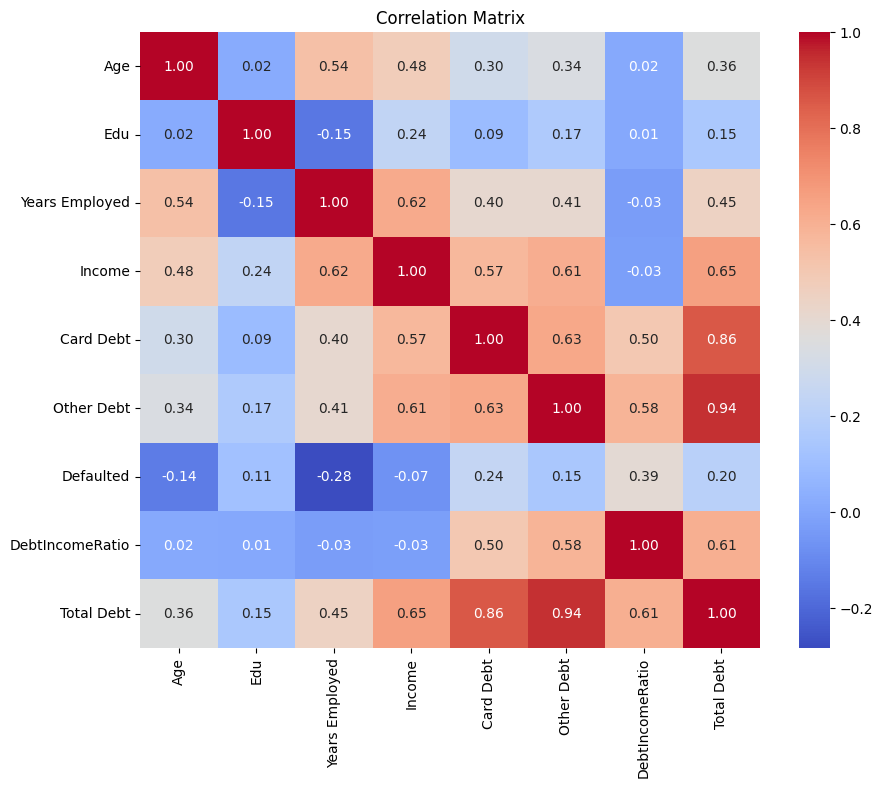

In [12]:
# Remove "Customer.Id" and "Address" columns
credit_card.drop(columns=['Customer Id'], inplace=True)

# Calculate correlation matrix
corr = credit_card.dropna(subset=['Defaulted']).corr()

# Select specific columns for analysis
corr_subset = corr[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio', 'Total Debt']]

# Calculate correlation p-values
p_mat = credit_card.dropna(subset=['Defaulted']).corr(method='pearson')

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

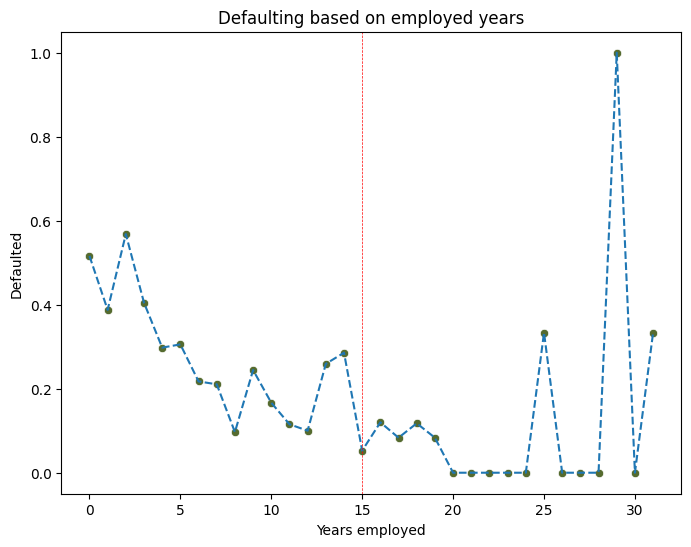

In [13]:
# Group by 'Years.Employed' and calculate mean of 'Defaulted'
def_emp = credit_card.dropna(subset=['Defaulted']).groupby('Years Employed')['Defaulted'].mean().reset_index()

# Plot Defaulting based on employed years
plt.figure(figsize=(8, 6))
sns.lineplot(x='Years Employed', y='Defaulted', data=def_emp, linestyle='dashed')
sns.scatterplot(x='Years Employed', y='Defaulted', data=def_emp, color='darkolivegreen', marker='o')
plt.axvline(x=15, linestyle='dashed', color='red', linewidth=0.5)
plt.title('Defaulting based on employed years')
plt.xlabel('Years employed')
plt.ylabel('Defaulted')
plt.show()

After around 15 years of experience the rate of Default is decreasing

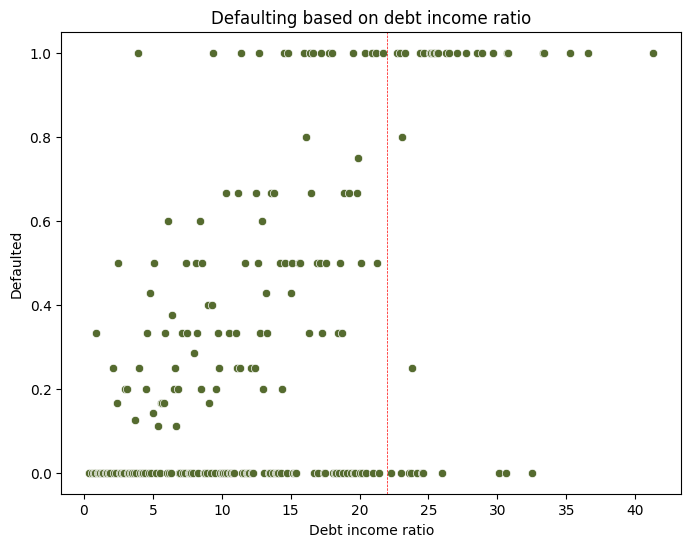

In [14]:
# Group by 'DebtIncomeRatio' and calculate mean of 'Defaulted'
def_debt = credit_card.dropna(subset=['Defaulted']).groupby('DebtIncomeRatio')['Defaulted'].mean().reset_index()

# Plot Defaulting based on debt income ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DebtIncomeRatio', y='Defaulted', data=def_debt, color='darkolivegreen', marker='o')
plt.axvline(x=22, linestyle='dashed', color='red', linewidth=0.5)
plt.title('Defaulting based on debt income ratio')
plt.xlabel('Debt income ratio')
plt.ylabel('Defaulted')
plt.show()


In [15]:
# Make a copy of the original DataFrame
cust2 = credit_card.copy()

# Initialize IterativeImputer with the desired parameters
imputer = IterativeImputer(max_iter=50, random_state=500)

# Perform imputation
imputed_data = imputer.fit_transform(cust2)

# Convert the imputed array back to a DataFrame
cust_imputed = pd.DataFrame(imputed_data, columns=cust2.columns)

# Check the imputed DataFrame
print(cust_imputed.head())

    Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0  41.0  2.0             6.0    19.0      0.124       1.073        0.0   
1  47.0  1.0            26.0   100.0      4.582       8.218        0.0   
2  33.0  2.0            10.0    57.0      6.111       5.802        1.0   
3  29.0  2.0             4.0    19.0      0.681       0.516        0.0   
4  47.0  1.0            31.0   253.0      9.308       8.908        0.0   

   DebtIncomeRatio  Total Debt  
0              6.3       1.197  
1             12.8      12.800  
2             20.9      11.913  
3              6.3       1.197  
4              7.2      18.216  


In [24]:
# Replace remaining missing values in Defaulted column with values from imputed data
cust_imputed['Defaulted'] = np.where(cust_imputed['Defaulted'].isnull(),
                                     imputed_data[:, cust_imputed.columns.get_loc('Defaulted')],
                                     cust_imputed['Defaulted'])

# Check for any remaining missing values in Defaulted column
print(cust_imputed['Defaulted'].isnull().sum())

# Using employed years to impute missing values in Defaulted column
credit_card['Defaulted'] = np.where(credit_card['Defaulted'].notnull(),
                                     credit_card['Defaulted'],
                                     np.where(credit_card['Years Employed'] >= 15, 0, 1))

# Check for any remaining missing values in Defaulted column after employing years-based imputation
print(credit_card['Defaulted'].isnull().sum())


0
0


In [25]:
# Create a DataFrame to compare the imputed values
compare = pd.DataFrame({'mice': cust_imputed['Defaulted'], 'empirical': credit_card['Defaulted']})

# Display the table comparing the two methods
print(compare.value_counts())

mice       empirical
 0.000000  0.0          517
 1.000000  1.0          183
-0.354975  0.0            1
 0.340692  1.0            1
 0.318449  0.0            1
                       ... 
 0.143841  1.0            1
 0.151913  1.0            1
 0.152795  1.0            1
 0.161835  0.0            1
 1.000546  1.0            1
Name: count, Length: 152, dtype: int64
